## Predict students' dropout and academic success
### A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters.

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [1]:
import pandas as pd 

In [2]:
studentDropout = pd.read_csv('data.csv', sep=';')
studentDropout


#svm 
#deep learnin
#auto-encoder, supervised methods, principal component analysis
# determine which column is the biggest factor on dropout rate

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Cleaning
#### The data cleaning process is performed by the 4 creators of this dataset, which are Valentino Realinho, Mónica Vieira Martins, Jorge Machado, Luís Baptista.
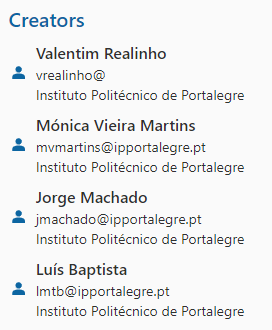
#### A thorough data prepocessing has been performed by them to handle anomalies, unexplanable outliers and missing values. Therefore, the data cleaning process is already done by the creators.

In [3]:
# Spell checking
studentDropout.rename(columns={"Nacionality":"Nationality", "Daytime/evening attendance\t":"Daytime/Evening attendance"})

,Marital status,Application mode,Application order,Course,Daytime/Evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Selection
#### I explored several websites to understand which aspects might have a stronger influence on the outcome. After going through these sources, I formed a hypothesis about which features could be more important compared to others.

Here are a few of my conclusion after reading form the sources I found:
- Grades
- Unemployment rate
- Course

<p>
Realizing that my own conclusion or idea might not be completely unbiased, I chose to use a random forest analysis to figure out which features are more important.</p>

**Sources:**
1. https://www.hindawi.com/journals/edri/2023/7704142/#conclusion-and-limitations
2. https://www.frontiersin.org/articles/10.3389/feduc.2023.1159864/full


#### Random Forest Classifier
The code utilizes the RandomForestClassifier from scikit-learn to analyze feature importances within the studentDropout dataset.
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Sepearate predictors (X) and target variable (y)
X = studentDropout.drop(columns='Target')
y = studentDropout['Target']

rf = RandomForestClassifier().fit(X,y)

# get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.147044
31                Curricular units 2nd sem (grade)    0.098952
24             Curricular units 1st sem (approved)    0.089247
25                Curricular units 1st sem (grade)    0.069785
16                         Tuition fees up to date    0.043080
12                                 Admission grade    0.042679
19                               Age at enrollment    0.039237
6                   Previous qualification (grade)    0.037615
29          Curricular units 2nd sem (evaluations)    0.037567
23          Curricular units 1st sem (evaluations)    0.035164
3                                           Course    0.031867
11                             Father's occupation    0.030869
10                             Mother's occupation    0.025576
35                                             GDP    0.023082
33                               Unemployment rate    0

##### The recommended data splits for this dataset is 8:2 in terms of train test ratio.